In [1]:
# Standard modules needed
import numpy as np
import pandas as pd
import datetime as dt
from types import SimpleNamespace
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# A discrete-continuous consumption-saving model

Here we will consider a modification to the 2-period consumption saving model.   
In addition to making a consumption-saving choice in the first period, there is now also a binary choice of whether or not to attend costly education. Taking an education is in this model associated with higher expected earnings in period 2 but it comes at a monetary cost in period 1.   

**Second period**  
Household gets utility from **consuming** and **leaving a bequest**:

$$
\begin{aligned}
v_{2}(m_{2})&= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(a_2+\kappa)^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
a_2 &= m_2-c_2 \\
a_2 &\geq 0
\end{aligned}
$$

**First period**   
Household gets utility from consuming. It takes into account that if choosing to go to school today, expected income will be higher in second period.

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1,s}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
s& = \begin{cases} 
1 & \text{if study in period 1} \\
0 & \text{otherwise}
\end{cases}\\
a_1&=m_1-c_1-\tau s\\
m_2&= (1+r)a_1+y_2 \\
y_{2}&= \begin{cases}
\bar{y} + \gamma s +\Delta & \text{with prob. }p\\
\bar{y} + \gamma s -\Delta & \text{with prob. }1-p 
\end{cases}\\
a_1&\geq0
\end{aligned}
$$

* $s$ is a binary indicator for whether the agent chooses to study in period 1.  
* $c$ is consumption
* $\gamma$ is the income premium associated with having studied 
* $\tau$ is the monetary cost of studying, paid in period 1
* $m$ is cash-on-hand  
* $a$ is end-of-period assets
* $\bar{y}$ is base income in period 2
* $y_2$ is total realized income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving if $p = 0.5$)
* $r$ is the interest rate
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $a\geq0$ ensures the household *cannot* borrow

**Hint:** the study choice is discrete (and thus not differentiable) which means that it cannot be optimized for in the same manner as the continuous consumption choice. Therefore, you need to solve the consumption problem *for each* of the two study choices and pick the **combination** of studying and consuming that yields highest value as the model solution.  

In [2]:

# Household example parameters
HH_example = SimpleNamespace(
    rho=8.0,          # risk aversion
    nu=0.1,           # bequest motive
    kappa=1,          # bequest parameter
    beta=0.90,        # discount factor
    tau=0.8,          # cost of studying
    gamma=1.2,        # income premium from studying
    ybar=1.5,         # base income in period 2
    r=0.04,           # interest rate
    y_prb_hi=0.5,     # probability of high income
    Delta=0.4,        # income risk
    max_debt=0,       # maximum debt allowed
    )

HH_example.m_min = HH_example.tau+1e-5,   # minimum value for m - must be possible to pay for studying
HH_example.m_max=5.0         # maximum value for m



### Question 1  
1. Solve the model for the parameters above. 


In [3]:
from ConsumptionSavingexam2022 import ConsumptionSavingModel

# Create model instances
model1 = ConsumptionSavingModel(HH_example)

model1_m1g, model1_c1, model1_s1, model1_v1, model1_m2g, model1_m2, model1_v2 = model1.solve()


2. Plot $v_1(m_1)$ and $v_2(m_2)$. Comment.


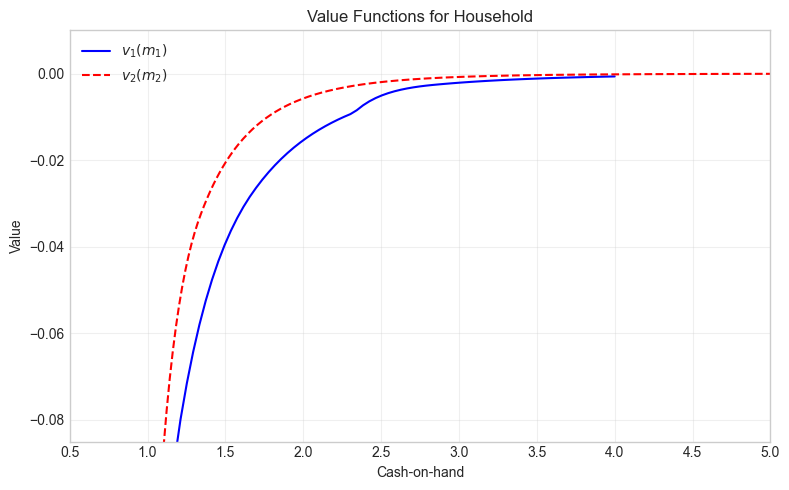

In [4]:
# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot value functions
ax.plot(model1_m1g, model1_v1, 'b-', label='$v_1(m_1)$')
ax.plot(model1_m2g, model1_v2, 'r--', label='$v_2(m_2)$')
ax.set_xlabel('Cash-on-hand')
ax.set_ylabel('Value')
ax.set_title('Value Functions for Household')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim((-0.085, 0.01))
ax.set_xlim((0.5, 5.0))

plt.tight_layout()
plt.show()
   

3. Plot the optimal consumption function $c_1^{*}(m_1)$ and $c_2^{*}(m_2)$ in one graph. Comment on the shapes of the functions.



4. Plot the optimal study choice function $\mathbb{I}^{s*}(m_1)$. Comment on the shape of the function.


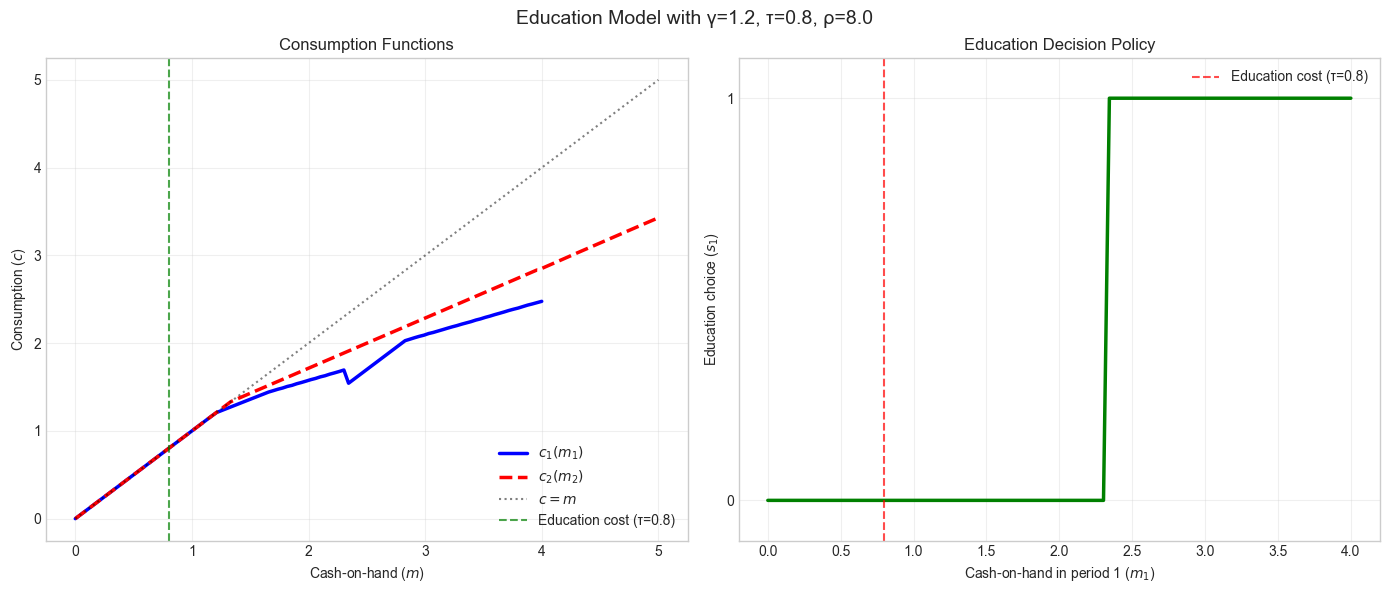

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_education_model(model):
    """
    Plot policy functions for the education model: consumption and education choice
    with period 1 and 2 consumption on the same panel, in a single row layout
    
    Args:
        model: Solved ConsumptionSavingModel with education choice
        
    Returns:
        fig, axes: The matplotlib figure and axes objects
    """
    # Extract the solved model components
    m1, c1, s1, v1, m2, c2, v2 = model.solve()
    
    # Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot consumption functions for both periods on the same panel (left panel)
    axes[0].plot(m1, c1, 'b-', linewidth=2.5, label='$c_1(m_1)$')
    axes[0].plot(m2, c2, 'r--', linewidth=2.5, label='$c_2(m_2)$')
    
    # Add 45-degree line (c=m) to visualize borrowing/saving behavior
    max_m = max(m1.max(), m2.max())
    axes[0].plot([0, max_m], [0, max_m], 'k:', alpha=0.5, label='$c=m$')
    
    # Add reference line for education cost
    if model.tau > 0:
        axes[0].axvline(x=model.tau, color='g', linestyle='--', alpha=0.7, 
                      label=f'Education cost (τ={model.tau})')
    
    axes[0].set_xlabel('Cash-on-hand ($m$)')
    axes[0].set_ylabel('Consumption ($c$)')
    axes[0].set_title('Consumption Functions')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot education choice function (right panel)
    axes[1].plot(m1, s1, 'g-', linewidth=2.5)
    
    # Add reference line for education cost
    if model.tau > 0:
        axes[1].axvline(x=model.tau, color='r', linestyle='--', alpha=0.7, 
                       label=f'Education cost (τ={model.tau})')
    
    axes[1].set_xlabel('Cash-on-hand in period 1 ($m_1$)')
    axes[1].set_ylabel('Education choice ($s_1$)')
    axes[1].set_title('Education Decision Policy')
    axes[1].set_yticks([0, 1])
    axes[1].set_ylim([-0.1, 1.1])
    if model.tau > 0:
        axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Add a main title for the whole figure
    plt.suptitle(f'Education Model with γ={model.gamma:.1f}, τ={model.tau:.1f}, ρ={model.rho:.1f}', 
                fontsize=14)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust for the suptitle
    
    return fig, axes

# Example usage:
fig, axes = plot_education_model(model1)
plt.show()

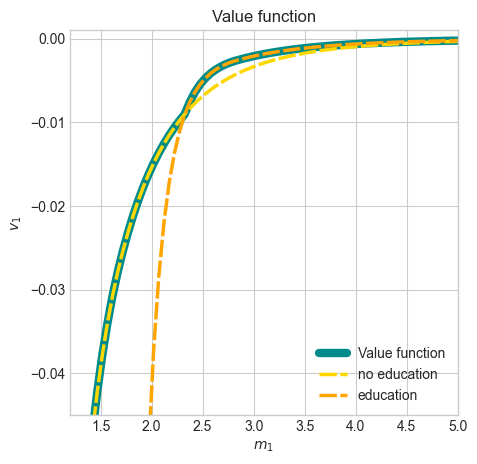

In [6]:
from scipy import interpolate
# This function creates the value function envelope plot using your existing functions and variable names
def plot_value_function_envelope(model):
    """
    Plot the value function in period 1 as an upper envelope of the education-choice specific value functions
    using your existing variable names and functions.
    """
    # First solve period 2
    m2, v2, c2 = model.solve_period_2()
    v2_interp = interpolate.RegularGridInterpolator([m2], v2, bounds_error=False, fill_value=None)
    
    # Create m1 grid
    m1s = np.linspace(1e-8, 5, 100)
    
    # Get value functions for both education choices using your solve_period_1_cons function
    v1s_no_study, _ = model.solve_period_1_cons(0, m1s, v2_interp)
    v1s_study, _ = model.solve_period_1_cons(1, m1s, v2_interp)
    
    # Create the upper envelope (max of the two value functions)
    upper = np.maximum(v1s_no_study, v1s_study)
    
    # Create figure
    fig = plt.figure(figsize=(17, 5))
    
    # Create value function subplot
    ax = fig.add_subplot(1, 3, 1)
    
    # Plot upper envelope with thick dark cyan line
    ax.plot(m1s, upper, label='Value function', color="darkcyan", linewidth=6)
    
    # Plot no-education value function with gold dashed line
    ax.plot(m1s, v1s_no_study, label='no education', 
            color="gold", linewidth=2.5, linestyle=(0,(5,1)))
    
    # Plot education value function with orange dashed line
    ax.plot(m1s, v1s_study, label='education',
            color="orange", linewidth=2.5, linestyle=(0,(5,1)))
    
    # Adjust the view limits if needed (may need to be adjusted based on your model parameters)
    ax.set_ylim((-0.045, 0.001))
    ax.set_xlim((1.2, 5.0))
    
    # Add labels
    ax.set_xlabel('$m_1$')
    ax.set_ylabel('$v_1$')
    ax.set_title('Value function')
    ax.legend()
    
    # If you want to add the other two plots from the professor's figure,
    # you can add them as additional subplots here
    
    return fig

# Example usage:
fig = plot_value_function_envelope(model1)
plt.show()


### Question 2  
1. Given the wage premium on education, compute the **smallest** education cost $\tau$ such that an agent with $m_1 = 3.0$ will **no longer** choose to study.  
    **Hint**: there are different ways of obtaining that number. A bisection algorithm is one possibility. 


In [7]:

def check_study_choice(tau, HH_params, m1_target=3.0):
    """
    Determine if an agent with cash-on-hand m1_target will choose to study
    given education cost tau.
    
    Args:
        tau (float): Education cost
        HH_params (SimpleNamespace): Household parameters
        m1_target (float): Target cash-on-hand level to check
        
    Returns:
        bool: True if agent chooses to study, False otherwise
    """
    # Create a copy of the parameters to avoid modifying the original
    mp = SimpleNamespace(**vars(HH_params))
    
    # Update tau parameter
    mp.tau = tau
    
    # Instantiate model
    model = ConsumptionSavingModel(mp)
    
    # Solve model
    m1, c1, s1, v1, _, _, _ = model.solve()
    
    # Interpolate to get study choice at exact m1_target
    s1_interp = np.interp(m1_target, m1, s1)
    
    # Since s is binary, we need to round to nearest integer
    # Study choice is 1 if s1_interp > 0.5
    return s1_interp > 0.5

def find_threshold_tau(HH_params, target_m1=3.0, tolerance=1e-4):
    """
    Find the minimum education cost tau that makes an agent with m1=target_m1
    not choose education.
    
    Args:
        HH_params (SimpleNamespace): Household parameters
        target_m1 (float): Target cash-on-hand level
        tolerance (float): Precision of the search
        
    Returns:
        float: Threshold value of tau
    """
    # Initial bounds for tau
    tau_low = 0.0
    tau_high = target_m1  # Cannot be higher than target_m1
    
    # Binary search (bisection method)
    while tau_high - tau_low > tolerance:
        tau_mid = (tau_low + tau_high) / 2
        studies = check_study_choice(tau_mid, HH_params, target_m1)
        
        if studies:
            # If agent still chooses to study, we need to increase tau
            tau_low = tau_mid
        else:
            # If agent doesn't study, we may be able to decrease tau
            tau_high = tau_mid
    
    # Return the minimum tau that makes agent not study
    return tau_high

# Function to be used in a notebook
def find_threshold_education_cost(HH_params=None, target_m1=3.0):
    """
    Function to be called from a notebook to find threshold tau.
    
    Args:
        HH_params (SimpleNamespace): Household parameters, if None uses predefined HH_example
        target_m1 (float): Target cash-on-hand level
        
    Returns:
        float: Threshold value of tau
    """
    # Use the predefined household parameters if none provided
    if HH_params is None:
        # This assumes HH_example is already defined in the notebook
        HH_params = HH_example
    
    # Find the threshold tau using bisection
    threshold_tau = find_threshold_tau(HH_params, target_m1)
    
    # Verify: at this tau, agent should not choose to study
    studies_at_threshold = check_study_choice(threshold_tau, HH_params, target_m1)
    
    # Verify: at slightly lower tau, agent should choose to study
    studies_below_threshold = check_study_choice(threshold_tau - 0.01, HH_params, target_m1)
    
    print(f"Threshold tau: {threshold_tau:.4f}")
    print(f"Studies at threshold tau: {studies_at_threshold}")
    print(f"Studies at tau slightly below threshold: {studies_below_threshold}")
    
    return threshold_tau

# Example usage in notebook:
threshold_tau = find_threshold_education_cost(HH_example)

Threshold tau: 1.1197
Studies at threshold tau: False
Studies at tau slightly below threshold: True
